<a href="https://colab.research.google.com/github/ilanmoshe52/Final_Project/blob/main/shapelets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tslearn --ignore-installed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 5.9 MB/s eta 0:00:00


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to generate sinusoidal signals with noise
def generate_signal(num_samples, num_sinuses):
    time = np.linspace(0, 2*np.pi, num_samples)
    signal = np.zeros(num_samples)
    for i in range(1,num_sinuses):
        amplitude = np.random.uniform(0.5, 2.5)
        if (i == 1 ):
          frequency = np.random.uniform(0.5, 2.5)
        else:
          frequency = (i+1)*1000*np.random.uniform(0.5, 2.5)

        phase = 0 #np.random.uniform(0, 2*np.pi)
        signal += amplitude * np.sin( frequency * time + phase)
    noise = np.random.normal(0, 0.5, num_samples)  # Additive Gaussian noise
    return signal + noise

# Generate dataset with three classes
num_samples = 32
num_classes = 2
num_signals = 100
X = []
y = []
for i in range(num_classes):
    for j in range(num_signals):
        num_sinuses = i + 1  # Class 1: 1 sinus, Class 2: 2 sinuses, Class 3: 3 sinuses
        signal = generate_signal(num_samples, num_sinuses)
        X.append(signal)
        y.append(i)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute the DTW distance between two signals
def dtw_distance(signal1, signal2):
    n = len(signal1)
    m = len(signal2)
    dtw_matrix = np.zeros((n + 1, m + 1))
    dtw_matrix[1:, 0] = np.inf
    dtw_matrix[0, 1:] = np.inf
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(signal1[i - 1] - signal2[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    return dtw_matrix[n, m]

# Function to classify a test signal using DTW
def classify_signal(test_signal, train_signals, train_labels):
    min_distance = np.inf
    predicted_class = None
    for i, train_signal in enumerate(train_signals):
        distance = dtw_distance(test_signal, train_signal)
        #print(distance)
        if distance < min_distance:
            min_distance = distance
            predicted_class = train_labels[i]
    return predicted_class



In [6]:
# Classify test signals and calculate accuracy
correct_predictions = 0
for i in range(len(X_test)):
    predicted_class = classify_signal(X_test[i], X_train, y_train)
    if predicted_class == y_test[i]:
        correct_predictions += 1

accuracy = correct_predictions / len(X_test)
print("Accuracy:", accuracy)


<ipython-input-4-3c523f46d787>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])


Streaming output truncated to the last 5000 lines.
7.829341417950082
22.23256467743943
7.646152914771866
12.318057526037762
8.933355673785728
12.218123208583469
18.578559723324705
13.84578253245461
16.465008469677038
13.005747956009554
14.120234104438103
11.49711362749081
14.92236870437342
8.58715839228231
9.700414775611813
11.050176144222142
9.209373425764715
9.974092232297998
13.226437349394844
22.397698300125032
18.027065850004615
19.791033045144815
16.63983155030475
10.394923170479522
12.668324079721632
23.64167998788698
11.569806793777635
8.149788269348347
21.85610162665612
17.505985716057644
12.395771433413532
16.511406895425242
15.421531482130485
11.538068712177814
16.784242229881666
16.07520340063284
15.123339841722784
19.881753857952905
15.706808797494407
19.02137423086419
9.025750731948596
10.456849479760395
20.95006194106958
19.202031172180966
9.60854825171543
9.062570894241615
17.043433276792193
17.069575523867332
12.820436546820694
15.211050131834405
8.633066356098709
15.1

In [53]:
from tslearn.shapelets import ShapeletModel
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax

# Load dataset
#X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

# Initialize shapelet model
shapelet_model = ShapeletModel(n_shapelets_per_size={10: 10},
                               optimizer="adam",
                               weight_regularizer=0.01,
                               )

# Fit the model on training data
shapelet_model.fit(X_train, y_train)

# Evaluate on test data
accuracy = shapelet_model.score(X_test, y_test)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Accuracy: 0.95


In [23]:
X_test.squeeze().shape


(40, 100)

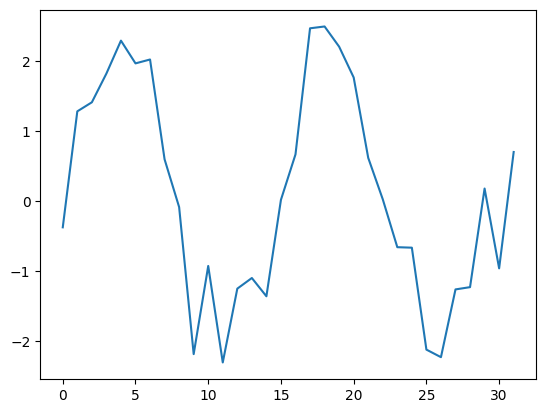

In [52]:
plt.plot(X[105])